In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the cryptocurrency and timeframe
crypto_symbol = "BTC-USD"
start_date = "2010-01-01"
end_date = "2024-01-01"

In [3]:
# Download historical price data
crypto_data = yf.download(crypto_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculate a simple moving average (SMA) for a specified period
sma_period = 200
crypto_data['SMA'] = crypto_data['Close'].rolling(window=sma_period).mean()

In [5]:
# Define the breakout threshold (e.g., 2% above the SMA)
breakout_threshold = 0.02

In [6]:
# Initialize variables to track the trade
in_trade = False
entry_price = 0
stop_loss = 0

In [7]:
# Create an empty DataFrame to store trade information
trade_history = pd.DataFrame(columns=['Date', 'Action', 'Price'])

In [8]:
# Create lists to store entry and exit points
entry_points = []
exit_points = []

In [9]:
# Iterate through the historical data
for i in range(len(crypto_data)):
    current_date = crypto_data.index[i]
    current_price = crypto_data['Close'][i]
    sma_value = crypto_data['SMA'][i]

    # Entry condition: Price crosses above SMA
    if current_price > sma_value * (1 + breakout_threshold):
        if not in_trade:
            entry_price = current_price
            stop_loss = entry_price * 0.95  # Setting a 5% stop-loss
            trade_history = trade_history.append({'Date': current_date, 'Action': 'Buy', 'Price': entry_price}, ignore_index=True)
            in_trade = True
            entry_points.append((current_date, entry_price))

    # Exit condition: Price hits stop-loss or a certain profit target (e.g., 10%)
    elif in_trade and (current_price <= stop_loss or (current_price / entry_price) >= 1.10):
        trade_history = trade_history.append({'Date': current_date, 'Action': 'Sell', 'Price': current_price}, ignore_index=True)
        in_trade = False
        exit_points.append((current_date, current_price))

# Print the trade history
trade_history

,Date,Action,Price
0,2015-06-30,Buy,263.071991
1,2015-08-18,Sell,211.078995
2,2015-10-14,Buy,251.988998
3,2018-02-05,Sell,6955.270020
4,2018-02-08,Buy,8265.589844
5,2018-03-12,Sell,9205.120117
6,2019-04-02,Buy,4879.877930
7,2019-09-25,Sell,8486.993164
8,2019-10-26,Buy,9244.972656
9,2019-11-11,Sell,8757.788086


In [12]:
# Calculate total profit
total_profit = trade_history[trade_history['Action'] == 'Sell']['Price'].sum() - trade_history[trade_history['Action'] == 'Buy']['Price'].sum()
print(f"Total Profit: {total_profit:.2f}")

Total Profit: 31544.10


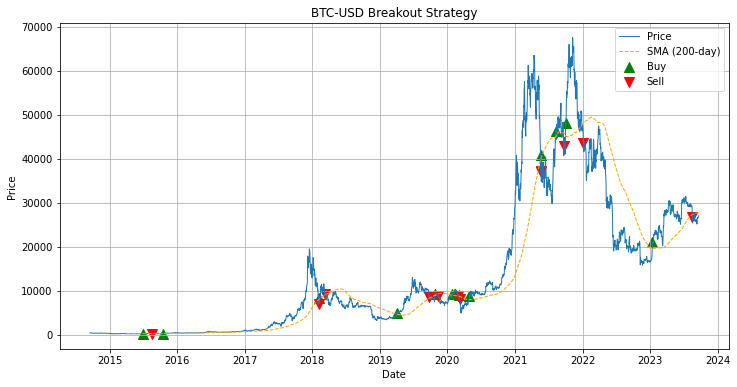

In [14]:
# Create a price chart with entry and exit points
plt.figure(figsize=(12, 6))
plt.plot(crypto_data.index, crypto_data['Close'], label='Price', linewidth=1)
plt.plot(crypto_data.index, crypto_data['SMA'], label='SMA ({}-day)'.format(sma_period), linestyle='--', color='orange', linewidth=1)

# Plot entry points
entry_dates, entry_prices = zip(*entry_points)
plt.scatter(entry_dates, entry_prices, marker='^', color='green', label='Buy', s=100)

# Plot exit points
exit_dates, exit_prices = zip(*exit_points)
plt.scatter(exit_dates, exit_prices, marker='v', color='red', label='Sell', s=100)

plt.title(f'{crypto_symbol} Breakout Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()